In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data=pd.read_csv("C:/Users/ranus/titanic/titanic/train.csv")
test=pd.read_csv("C:/Users/ranus/titanic/titanic/test.csv")
#target_train=data["Survived"]
#target_test=data["Survived"]
#del data["Survived"]
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data analyse

Nous allons tout d'abord effectuer une analyse de donnée pour avoir une vision d'ensemble des données.

### Analyse de forme
- **variable target** : La variable target est Survived
- **dimension de la dataframe**: 891, 12
- **type de données** : il y a 3 types de données dans cette dataframe des int, des float et des variables catégorique.
- **valeurs manquantes** : les variables cabin, age et Embarked possèdent des valeurs manquantes. De plus la carte de chaleur ne semble pas montrer de lien entre les donnée manquantes

### Analyse de fond
- **Variable target** : Il s'agit d'une variable binaire avec une proportion de 0.6/0.4

## Analyse de forme

In [2]:
df=data.copy() #on réalise une copie des données
df.info() #on obtient des information interessante
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(891, 12)

In [3]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

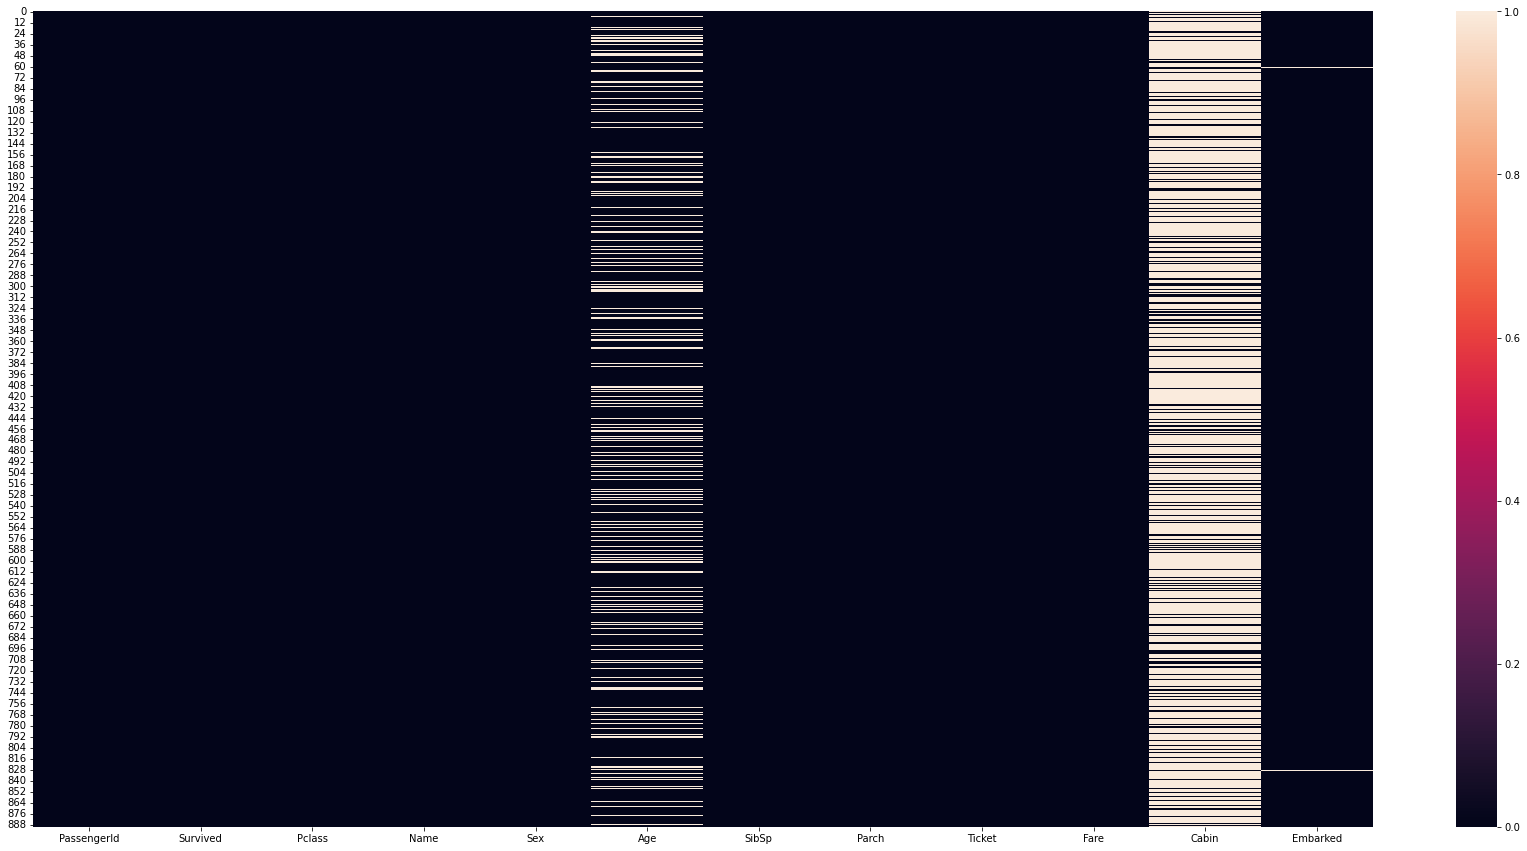

In [4]:
plt.figure(figsize=(30,15))
sns.heatmap(df.isna())

In [5]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=False) # on affiche le pourcentage de valeur manquante

Cabin          0.771044
Age            0.198653
Embarked       0.002245
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
dtype: float64

Aucune variable n'a plus de 90% de valeurs manquantes, on garde donc toutes les colonnes.

## Analyse de fond

<AxesSubplot:>

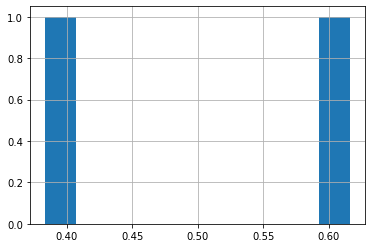

In [6]:
target='Survived'
df[target].value_counts(normalize=True).hist()

### Variables quantitatif

C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

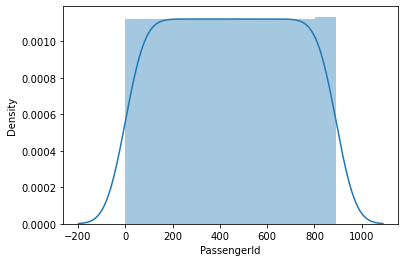

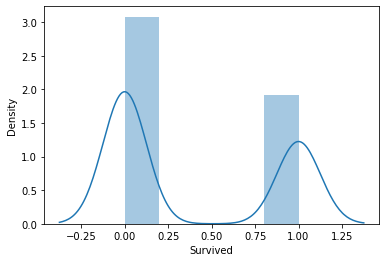

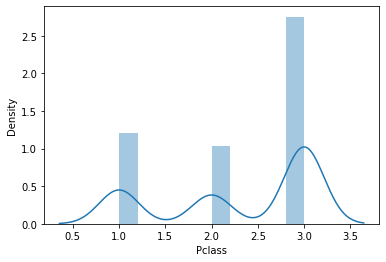

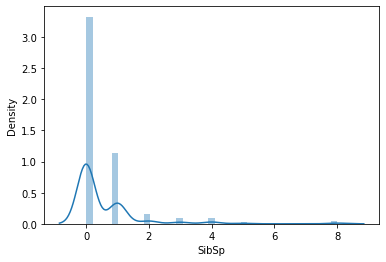

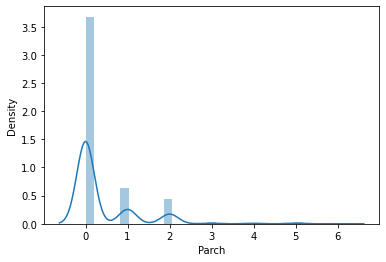

In [7]:
for col in df.select_dtypes('int64'):
    plt.figure()
    sns.distplot(df[col])

<Figure size 432x288 with 0 Axes>

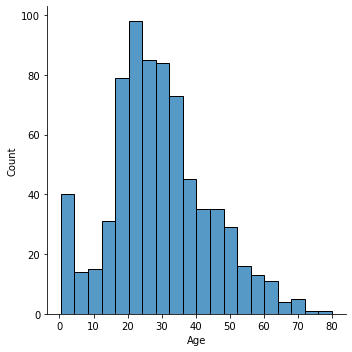

<Figure size 432x288 with 0 Axes>

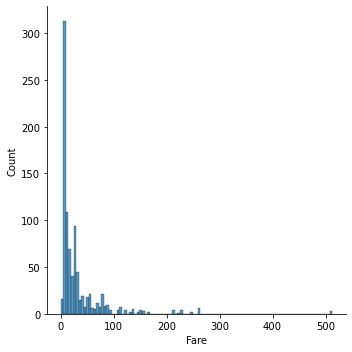

In [8]:
for col in df.select_dtypes('float64'):
    plt.figure()
    sns.displot(df[col])

On constate que les 2 derniers histogramme ont des piques en 0, de plus l'histogramme variable age forme la densité d'une loi gaussienne.
Le graphe de la variable PassengerId forme une loi uniforme ce qui est normale étant donnée qu'elle caractérise les observations.

### Variable qualitatif

On va tout d'abord afficher les différentes catégorie puis on va afficher leurs graphes

In [9]:

for col in df.select_dtypes('object'):
    print(f' {col :-<60}  {df[col].unique()}')

 Name--------------------------------------------------------  ['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, M

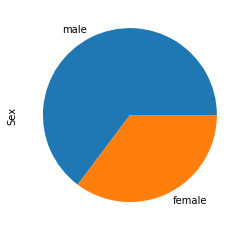

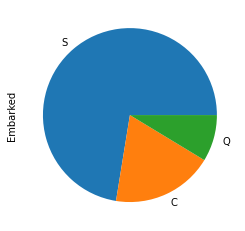

In [10]:
Cols=['Sex','Embarked']
for col in Cols:
    plt.figure()
    df[col].value_counts().plot.pie()

Il est judicieux de n'afficher seulement les pieplot des features Embarked et Sex.
Sur ces 2 graphes on peut voir qu'il y avait une majorité d'homme sur le titanic et que la majorité des passagers ont embarqué à l'embarquement S.

### Influence des variables sur la variables target
Nous allons désormais cherchais à évaluer l'impact des différentes variables sur la cible.
Pour cela nous allons commencer par séparer la dataframe en 2 d'un coté les survivants et de l'autre les non survivants, puis nous allons voir si leur graphes on les mêmes moyenne/forme.

C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ranus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

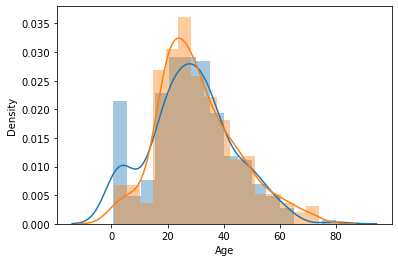

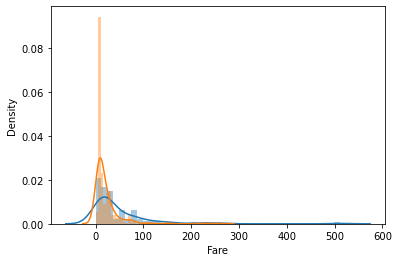

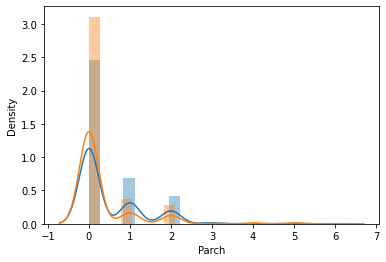

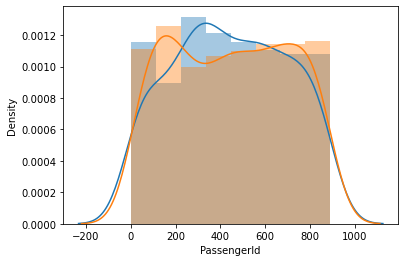

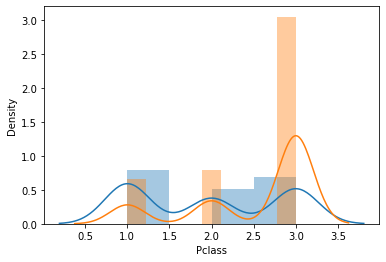

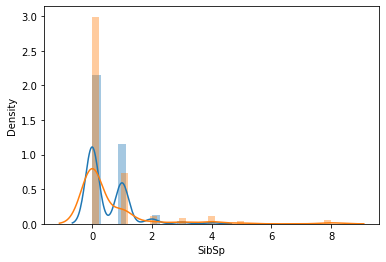

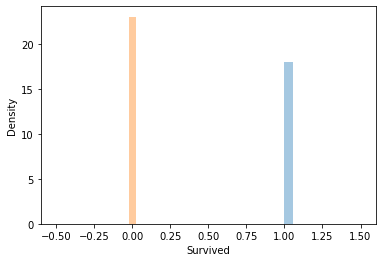

In [11]:
df_Survived=df[df['Survived']==1]
df_noSurvived=df[df['Survived']==0]

cols2=[]
for col in df.columns:
    cols2.append(col)
cols2=df.select_dtypes('int64')| df.select_dtypes("float64")

#for col in df.columns:
for col in cols2:
    plt.figure()
    sns.distplot(df_Survived[col],label="Survive")
    sns.distplot(df_noSurvived[col],label="noSurvived")

On remarque plusieurs point important. Tout d'abord il semblerait qu'une grande majorité des non-survivants était en Classe 3.

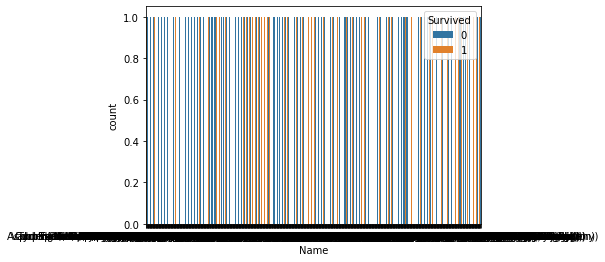

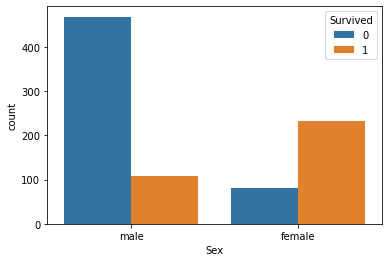

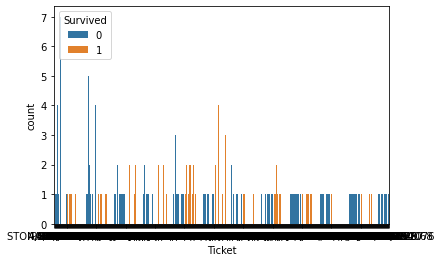

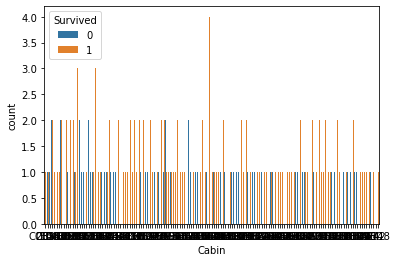

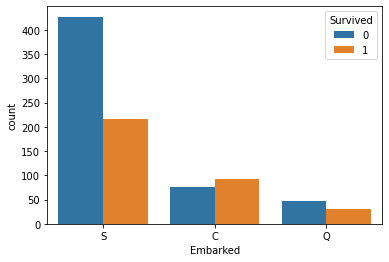

In [12]:
for col in df.select_dtypes('object'):
    plt.figure()
    sns.countplot(x=col,hue='Survived', data=df)
    

Ces graphes nous donnent de précieuse information, tout d'abord en terme de proportion il y a plus de rescapé du côté des femmes que des hommes, il serait intéressant d'évaluer ces proportions.
On remarque également une disparité sur le ratio entre les survivants et les non-survivants. Les embarquements C et Q ont plus ou moins le même ratio et comportent nettement moins d'individus que l'embarquement C. De plus, la proportion de survivant sur l'embarquement C est nettement moins élevé.


In [13]:
df_male=df[df["Sex"]=="male"]
df_female=df[df["Sex"]=="female"]

ms=df_male[df_male["Survived"]==1].shape[0]/df_male.shape[0]
mns=df_male[df_male["Survived"]==0].shape[0]/df_male.shape[0]
mf=df_female[df_female["Survived"]==1].shape[0]/df_female.shape[0]
mnf=df_female[df_female["Survived"]==0].shape[0]/df_female.shape[0]


valeurs_hommes, valeurs_femmes=[[ "survivants",ms],["non survivants",mns]], [["survivantes",mf],["non survivantes",mnf]]

pd.DataFrame(data=valeurs_hommes,columns=["Homme survivant","proportion"])



,Homme survivant,proportion
0,survivants,0.188908
1,non survivants,0.811092


In [14]:
pd.DataFrame(data=valeurs_femmes,columns=["Femme survivant","proportion"])

,Femme survivant,proportion
0,survivantes,0.742038
1,non survivantes,0.257962


`On voit que 74% des femmes ont survécu au naufrage contre seulement 19% pour les hommes.`

Effectuons maintenant un tableau de contingence.

In [19]:
pd.crosstab(df["Survived"],df["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


* Il y a $n=891$ individus.
* $P(Survivre)=342/891$
* $P(ne\ pas\ survivre)=549/891$
* $P(Etre\ une\ femme)=314/891$
* $P(Etre\ un\ homme)=577/891$ 
 
Par la formules de Bayes, nous avons:
* $P(Etre\ une\ femme\ |\ survivante)=233/342$
* $P(Etre\ une\ femme \ |\ ne\ pas\ survivre)=81/549$
* $P(Etre\ un\ homme \ | \ survivant)=109/342$
* $P(Etre\ un\ homme \ |\ ne\ pas\ survivre)=468/549$ 

*   $P(\ survivant \ | \ Etre\ un\ homme \ )=109/577\approx 0.19$     
*   $P(ne\ pas\ survivre\ | \ Etre\ un\ homme \ )=468/577\approx 0.83$



* $P(\ survivante \ | \ Etre\ une\ femme \ )=233/314\approx 0.74$
* $P(ne\ pas\ survivre\ | \ Etre\ une\ femme \ )=81/314 \approx0.26$

`La probilité pour un homme de survivre au naufrage du titanic était seulement de 0.19 tandis que pour les femmes la probabilité était nettement plus haute avec 0.74`

In [20]:
pd.crosstab(df["Survived"],df["Embarked"])

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217



* $P(\ survivant \ | \ Embarquement \ C \ )=93/168 \approx 0.55$
* $P(ne\ pas\ survivre\ | \ Embarquement\ C )=75/168 \approx 0.45$ 

* $P(\ survivant \ | \ Embarquement \ Q \ )=30/77 \approx 0.40$
* $P(ne\ pas\ survivre\ | \ Embarquement\ Q  )=47/77 \approx 0.60$


* $P(\ survivant \ | \ Embarquement \ S \ )=217/644 \approx 0.34$
* $P(ne\ pas\ survivre\ | \ Embarquement\ S )=427/644 \approx 0.66$

`Il semblerait que la probabilité de survivre était plus faible pour les passagers qui ont embarqué au point S`

# Classification

Dans cette partie nous allons entrainer un algorithme à reconnaitre les survivants.

Dans un premiers temps on identifie les variables qui sont corrélé linéairement avec la variable target.
Affichons une carte graphique afin d'avoir un indicateur sur les correlations entre les différentes variables.

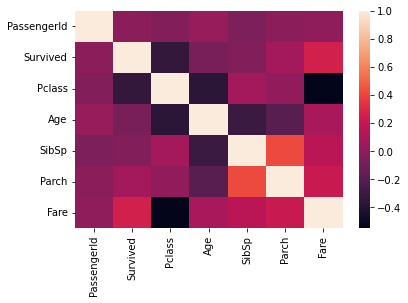

In [21]:
sns.heatmap(data.corr())
plt.show()

Effectuons un tri sur les variables à conserver et remplaçons les valeurs manquantes par leurs valeurs median.

In [22]:
from sklearn import preprocessing
def clean(data):
    inutile=["PassengerId","Name","Cabin","Ticket"]
    data=data.drop(inutile,axis=1)
    cols=["Parch","Age","SibSp","Fare"]
    for col in cols:
        data[col].fillna(data[col].median(),inplace = True)
    data["Embarked"].fillna("U", inplace=True)
    return data
data=clean(data)
test=clean(test)
L=preprocessing.LabelEncoder()

cols=["Sex","Embarked"]
for col in cols:
    data[col]=L.fit_transform(data[col])#?
    test[col]=L.transform(test[col])#?
    print(L.classes_)#pour voir comment s'est effectuer la transformation
data.head()

['female' 'male']
['C' 'Q' 'S' 'U']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


On va maintenant isoler la variable target des autres variables et couper les données en deux pour avoir des données d'entrainement et des données test.

In [23]:

target=data["Survived"]
data=data.drop("Survived", axis=1)

data_train,data_test,target_train,target_test=train_test_split(data,target,train_size=0.8,random_state=42)

La variable target ne comporte que deux valeurs possible, il est donc judicieux d'effectuer une regression logistique pour prédire les valeurs.

In [24]:
clf=LogisticRegression(random_state=0,max_iter=1000).fit(data_train,target_train)
prediction=clf.predict(data_test)
accuracy_score(target_test,prediction)

0.8100558659217877

On aurait également utiliser une méthode de prédiction.

On peut par exemple utiliser la classification par forêt aléatoire, il faudra cependant optimiser les hyper parametres.

In [25]:
forest=RandomForestClassifier()

param_grid={"n_estimators":[50,100,200,500],"max_depth":[None, 5, 10], "min_samples_split":[2,3,4]}

grid_search=GridSearchCV(forest,param_grid,cv=3, scoring="accuracy",return_train_score=True)

grid_search.fit(data,target)


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200, 500]},
             return_train_score=True, scoring='accuracy')

In [26]:
tree=grid_search.best_estimator_
